In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import random
from networkx.algorithms import community

# Importation des fichiers

In [2]:
nodes_data = pd.read_csv("nodes_cluster_5.csv", sep=";")

In [3]:
nodes_data

id  coord  core  gender
0    71645      0     1       0
1     8054      0     1       0
2     3723      0     0       0
3     8147      0     0       0
4     8141      0     1       1
..     ...    ...   ...     ...
305  38974      0     0       0
306  38932      0     1       0
307  92307      0     0       1
308  61531      0     0       1
309  92243      0     0       1

[310 rows x 4 columns]

In [4]:
nodes_data['coord'].value_counts()

0    310
Name: coord, dtype: int64

In [5]:
nodes_data['core'].value_counts()

0    206
1    104
Name: core, dtype: int64

Text(0, 0.5, 'Nombre')

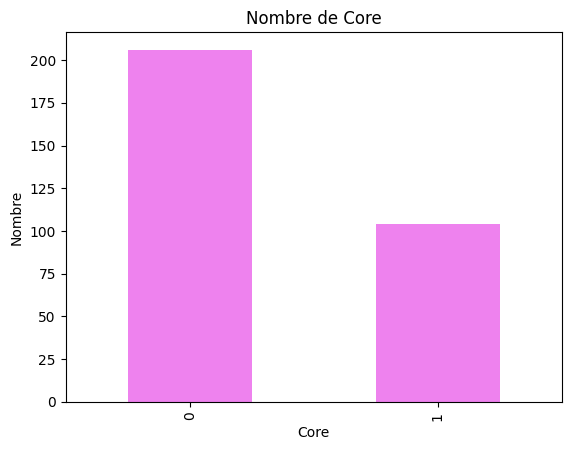

In [6]:
core_count = nodes_data['core'].value_counts()
core_count.plot(kind="bar", title="Nombre de Core", color="violet")
plt.xlabel("Core")
plt.ylabel("Nombre")

<Figure size 700x500 with 0 Axes>

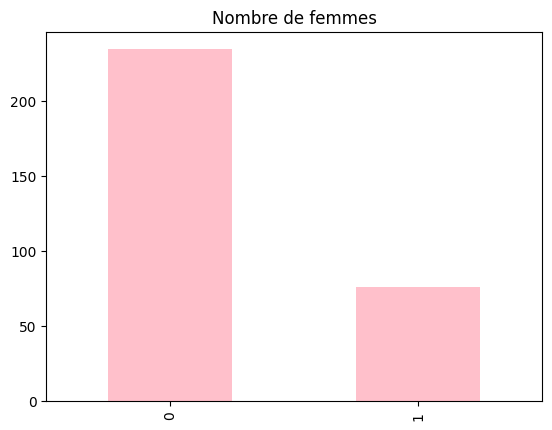

<Figure size 700x500 with 0 Axes>

In [7]:
gender_count = nodes_data['gender'].value_counts()
gender_count.plot(kind="bar", title="Nombre de femmes", color="pink")
plt.figure(figsize=(7, 5))


In [3]:
edges_data = pd.read_csv("edges_cluster_5.csv", sep=";")

In [9]:
edges_data

source  target  pre_link  post_link
0      71645    1885         0          1
1       8054    1948         1          1
2       3723    1948         1          1
3       8158    2962         0          1
4      92218    2962         0          1
...      ...     ...       ...        ...
3207   57780  116164         0          1
3208    8191  116164         1          1
3209   73416  116164         0          1
3210   38931  116369         0          1
3211    8061  116369         0          1

[3212 rows x 4 columns]

# Construction des réseaux 

## Avant le traitement

In [4]:
G = nx.from_pandas_edgelist(edges_data[edges_data['pre_link'] == 1], 'source', 'target', create_using=nx.Graph()) 

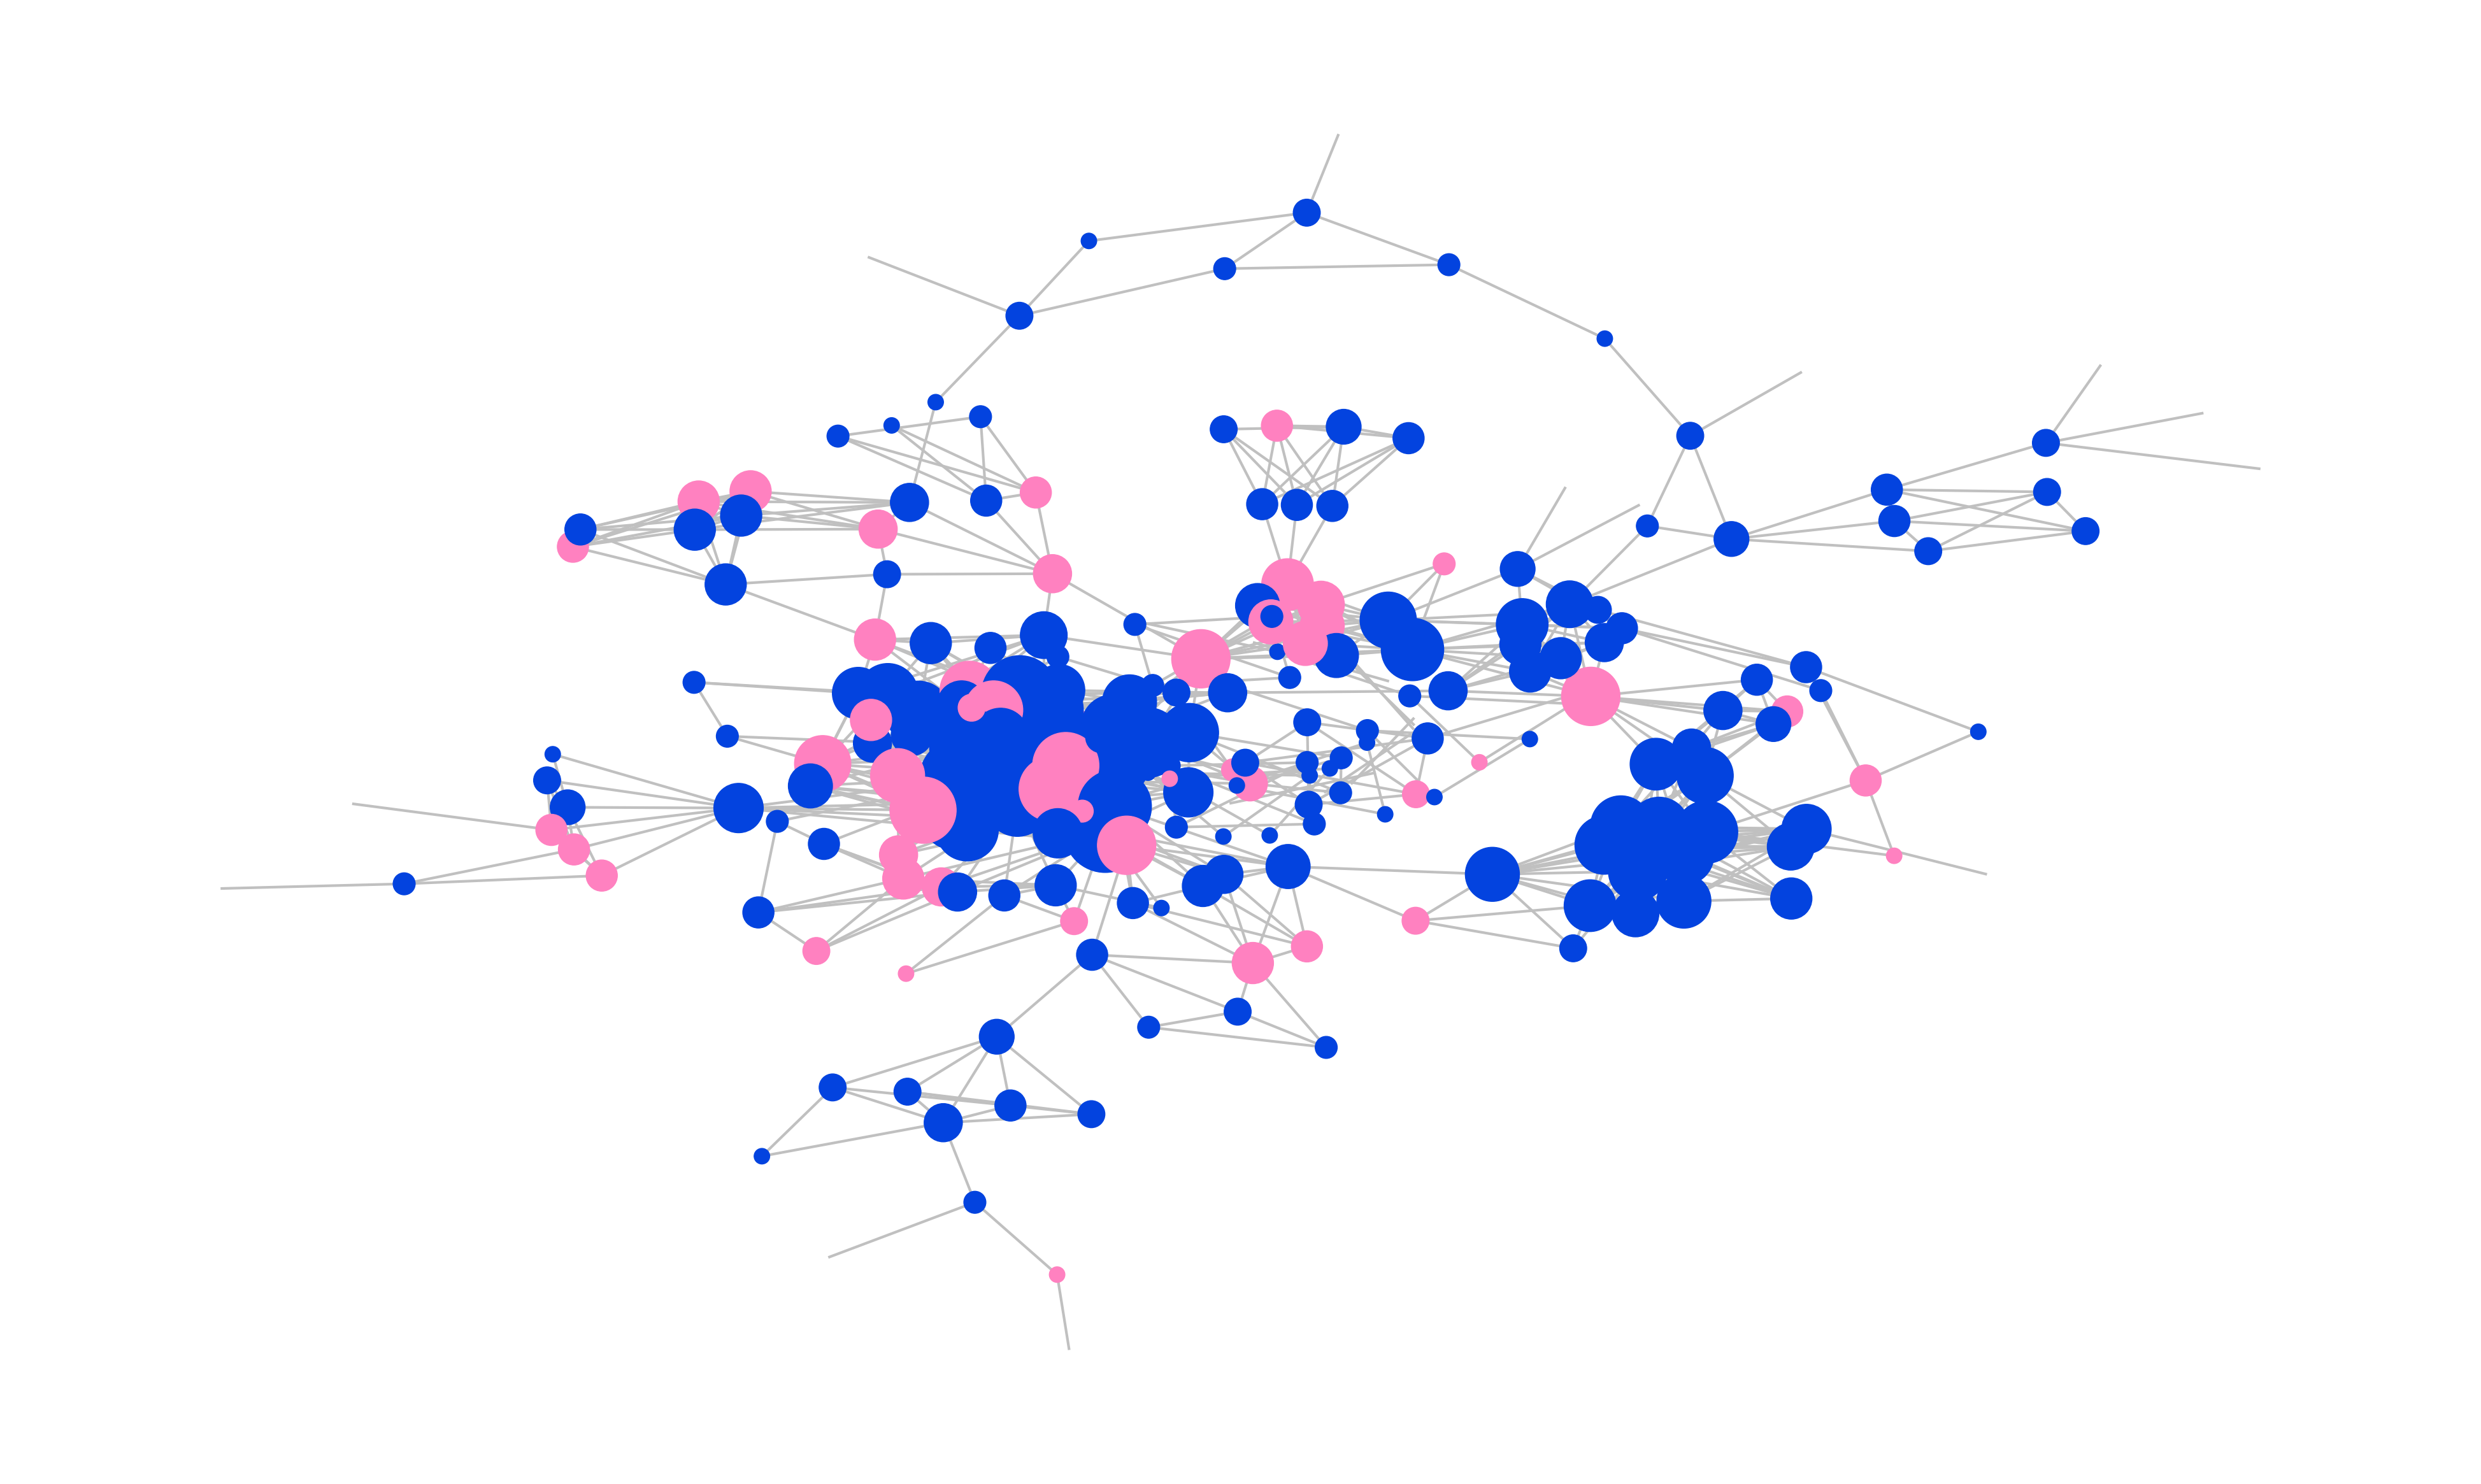

In [7]:
# Attribuer le genre (homme et femme) à chaque noeud du réseaux
gender_dict = nodes_data.set_index('id')['gender'].to_dict()
nx.set_node_attributes(G, gender_dict, 'gender')

#print(nx.get_node_attributes(G, 'gender'))
node_colors_G = []
for node in G.nodes(data=True):
    if node[1]["gender"]== 0 :
        node_colors_G.append("xkcd:blue")
    elif node[1]["gender"]== 1 :
        node_colors_G.append("xkcd:pink")
        
pos = nx.kamada_kawai_layout(G)

degrees = [d for n,d in G.degree()]
degree_min = min(degrees)
degree_max = max(degrees)
degrees = [(d-degree_min)  / (degree_max - degree_min)*10000 for d in degrees]

# Tracé du graphe
plt.figure(figsize=(50, 30))
nx.draw_networkx(G,pos=pos,node_color=node_colors_G,node_size=[v for v in degrees], edge_color='silver',width=3.0,with_labels=False)
# Désactivation des axes
plt.axis('off')
# Affichage du graphe
plt.show()

In [35]:
num_female_nodes = 0

# Iterate over nodes and count female nodes
for node, attr in G.nodes(data=True):
    if attr['gender'] == 1:  # Assuming 1 represents female gender
        num_female_nodes += 1

# Print the number of female nodes
print("Number of female nodes:", num_female_nodes)

Number of female nodes: 53


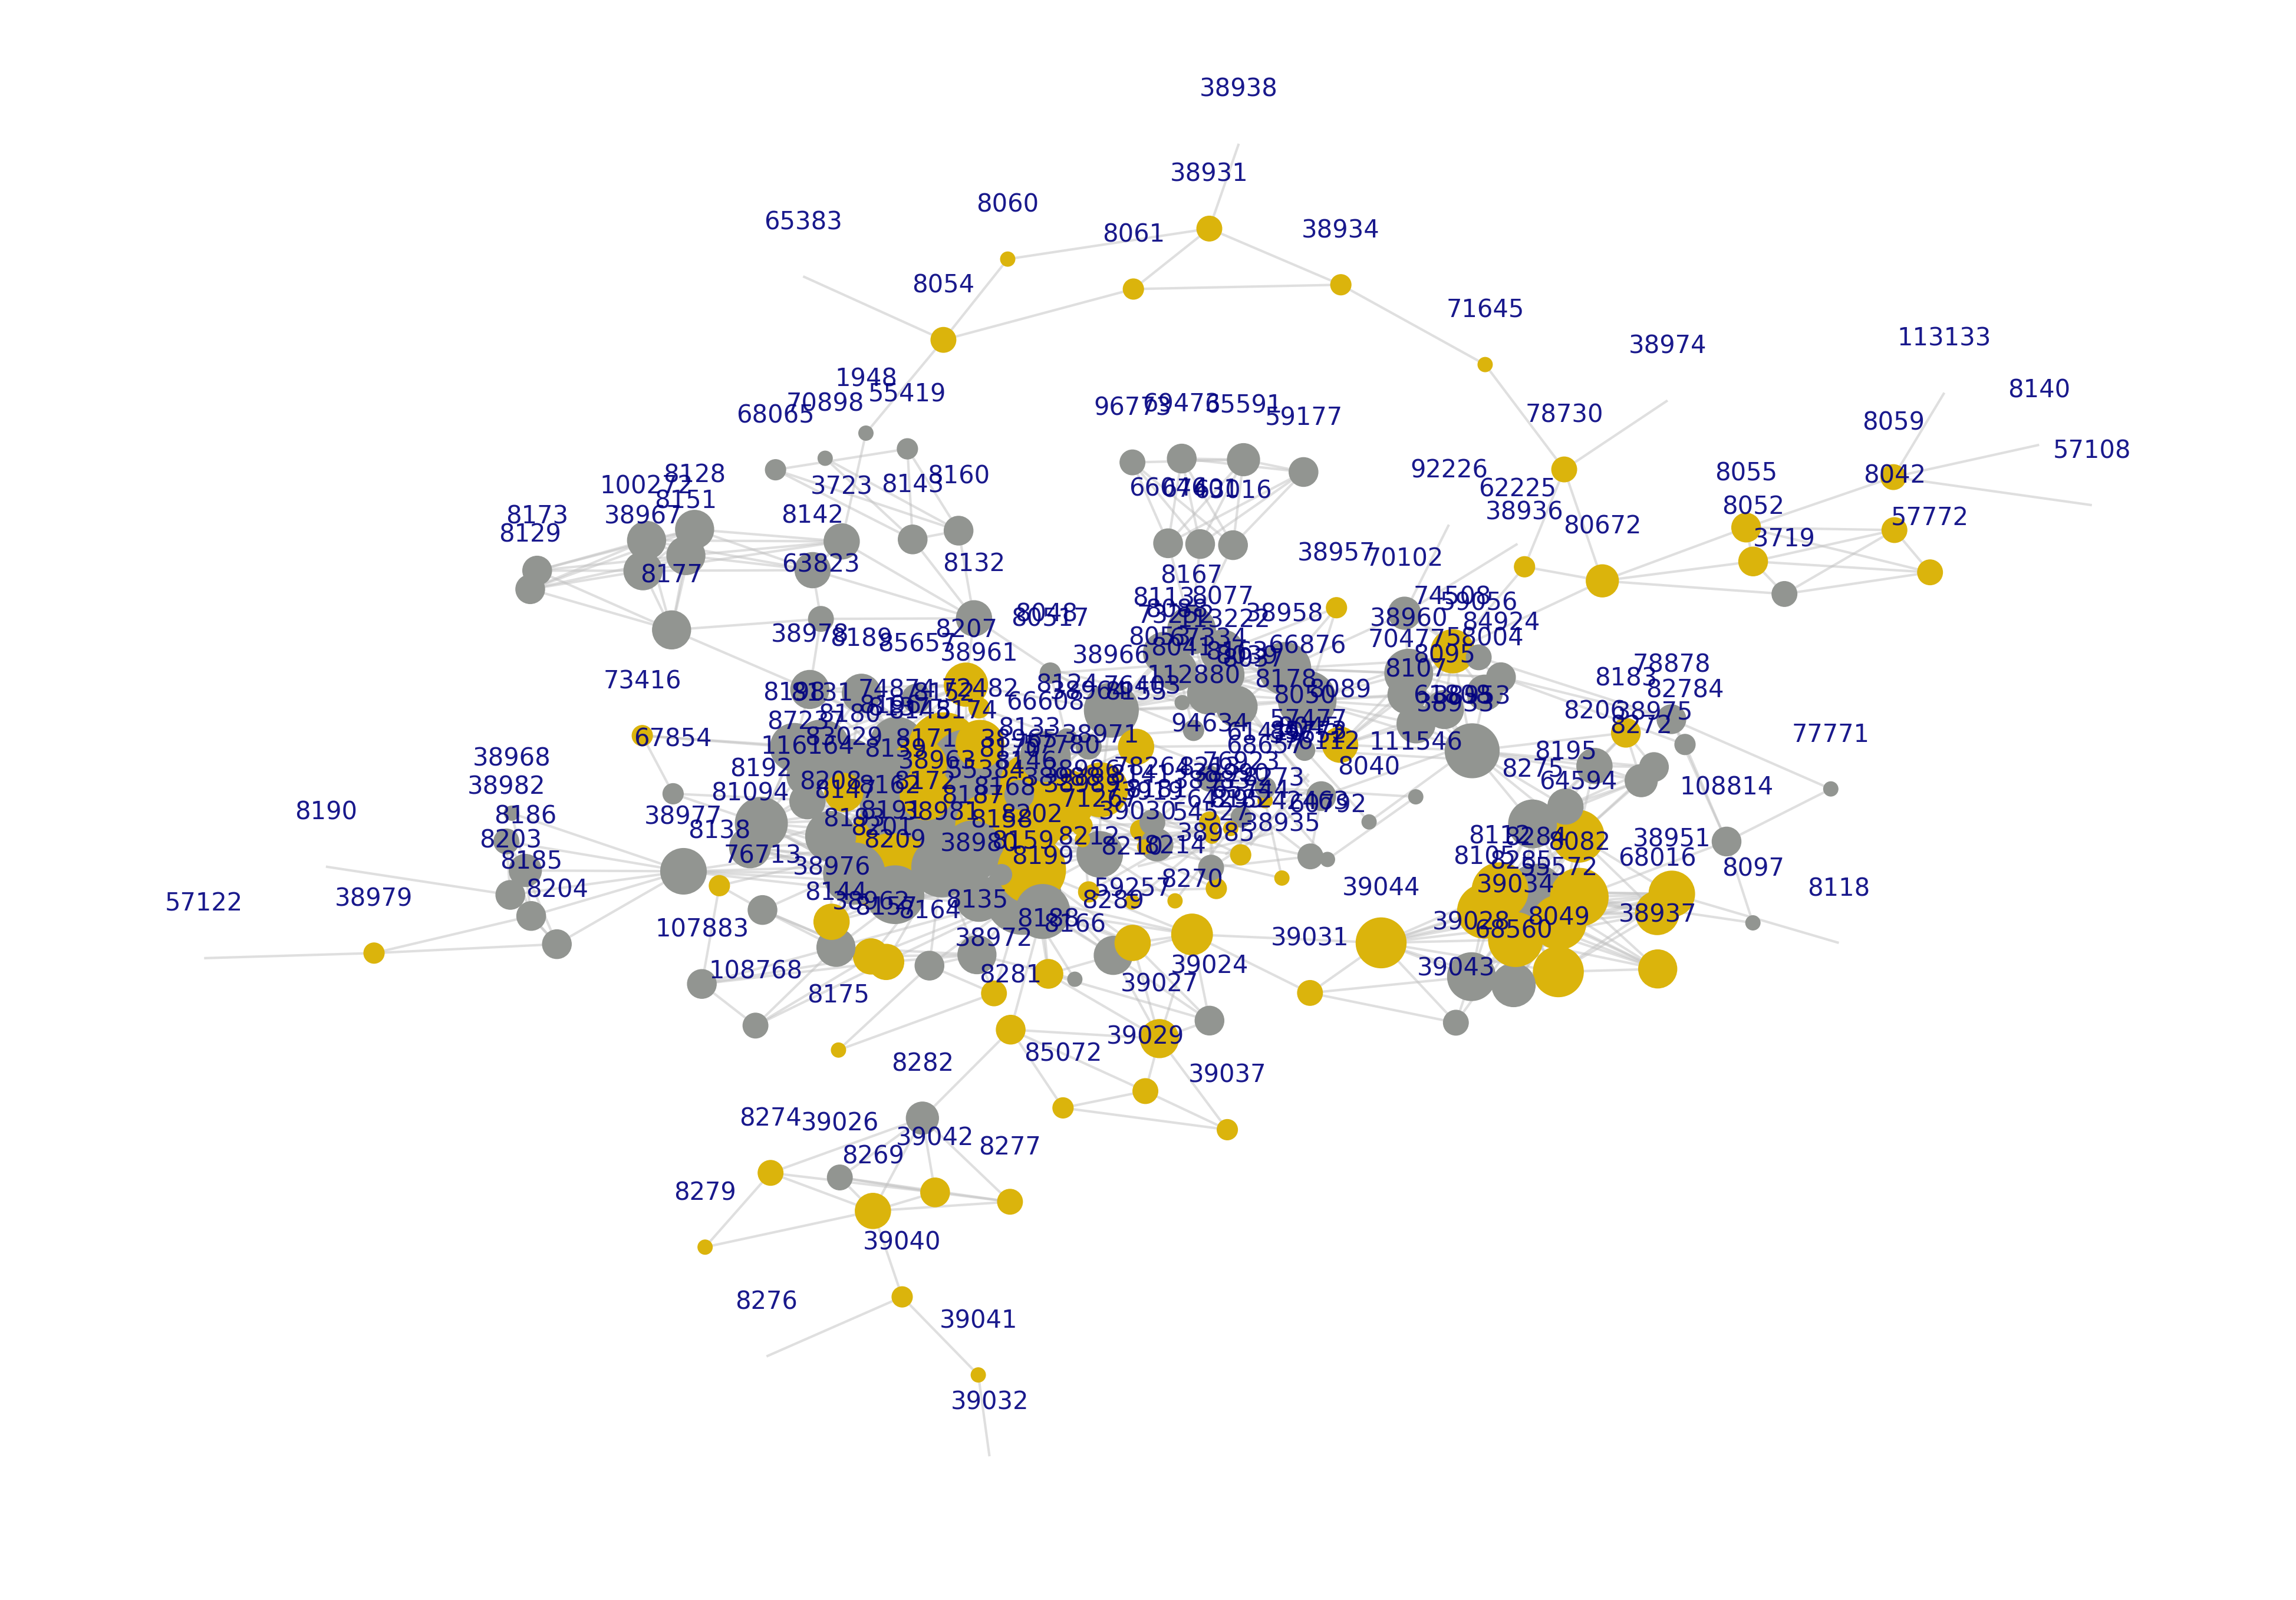

In [8]:
core_dict = nodes_data.set_index('id')['core'].to_dict()
nx.set_node_attributes(G, core_dict, 'core')

node_colors_2 = []
for node in G.nodes(data=True):
    if node[1]["core"]== 0 :
        node_colors_2.append("xkcd:grey")
    elif node[1]["core"]== 1 :
        node_colors_2.append("xkcd:gold")
        
pos = nx.kamada_kawai_layout(G)

degrees = [d for n,d in G.degree()]
degree_min = min(degrees)
degree_max = max(degrees)
degrees = [(d-degree_min)  / (degree_max - degree_min)*10000 for d in degrees]
# Scale the node size to their degree & set node color to 'teal' 
nx.draw_networkx_nodes(G, pos, node_size=[v for v in degrees], node_color=node_colors_2)
# Draw the edges with gray lines
nx.draw_networkx_edges(G, pos, edge_color='silver', width=3.0, alpha=0.5)
for node, (x, y) in pos.items():
    pos[node] = (x, y+0.08)
    
nx.draw_networkx_labels(G, pos, font_size=30, font_color='navy', alpha=0.9)
plt.rcParams['figure.figsize'] = [50, 35]
# Set the axis to be off
plt.axis('off')
# Display the graph 
plt.show()

In [36]:
num_core_nodes = 0

# Iterate over nodes and count female nodes
for node, attr in G.nodes(data=True):
    if attr['core'] == 1:  # Assuming 1 represents female gender
        num_core_nodes += 1

# Print the number of female nodes
print("Number of core nodes:", num_core_nodes)

Number of core nodes: 95


In [9]:
print(f"Le réseaux est il dirigé ? : {nx.is_directed(G)}")

Le réseaux est il dirigé ? : False


In [10]:
print(f"le nombre de noeuds dans le réseaux : {G.number_of_nodes()}")

le nombre de noeuds dans le réseaux : 242


In [11]:
list_nodes_in_G=list(G.nodes())
list_nodes= list(nodes_data["id"])

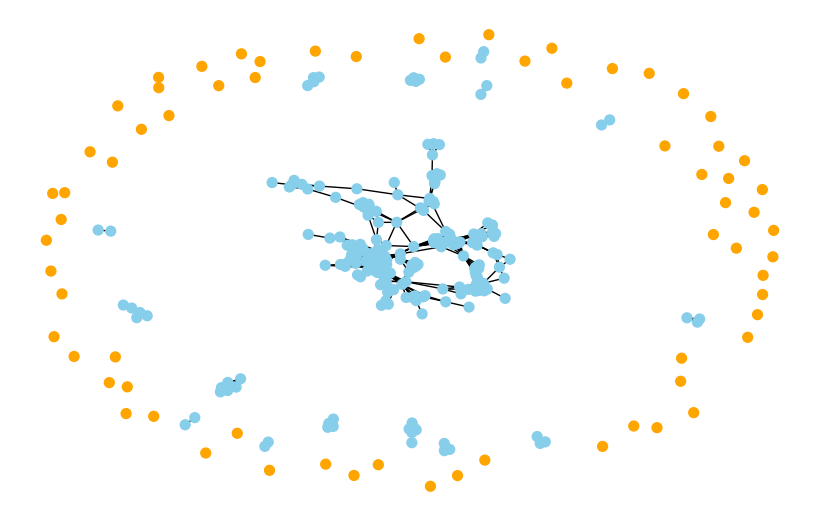

Le nombre de noeuds isolés : 68


In [12]:
# Create a new graph with isolated nodes
G_with_isolated = nx.Graph()

# Add nodes from your original graph G
G_with_isolated.add_nodes_from(G.nodes())

# Add isolated nodes that are not already in the graph G
isolated_nodes = [node for node in list_nodes if node not in G.nodes()]
G_with_isolated.add_nodes_from(isolated_nodes)

# Add edges between connected nodes in the original graph G
G_with_isolated.add_edges_from(G.edges())

# Draw the graph with isolated nodes and color them differently
plt.figure(figsize=(8, 5))
node_colors = ['skyblue' if node in G.nodes() else 'orange' for node in G_with_isolated.nodes()]
nx.draw(G_with_isolated, with_labels=False, node_color=node_colors, node_size=50, font_size=10)

# Show the plot
plt.show()
# If you want to count the number of isolated nodes added, you can do:
num_isolated_nodes_added = len(isolated_nodes)
print("Le nombre de noeuds isolés :", num_isolated_nodes_added)

In [13]:
differences=set(list_nodes)-set(list_nodes_in_G)
differences
id_gender_dict = nodes_data.set_index('id')['gender'].to_dict()
id_core_dict= nodes_data.set_index('id')['core'].to_dict()
# Find genders for IDs in the list
gender_list = [id_gender_dict.get(id) for id in differences if id in id_gender_dict]
core_list=[id_core_dict.get(id) for id in differences if id in id_core_dict]
print(f"Le nombre d'hommes n'ayant pas de liens est :{gender_list.count(0)}")
print(f"Le nombre de femmes n'ayant pas de liens est :{gender_list.count(1)}")
print(f"Le nombre de core n'ayant pas de liens est :{core_list.count(1)}")
print(f"Le nombre de non-core n'ayant pas de liens est :{core_list.count(0)}")

Le nombre d'hommes n'ayant pas de liens est :45
Le nombre de femmes n'ayant pas de liens est :23
Le nombre de core n'ayant pas de liens est :9
Le nombre de non-core n'ayant pas de liens est :59


In [14]:
print(f"Le nombre de liens dans le réseau : {G.number_of_edges()}")

Le nombre de liens dans le réseau : 869


<BarContainer object of 34 artists>

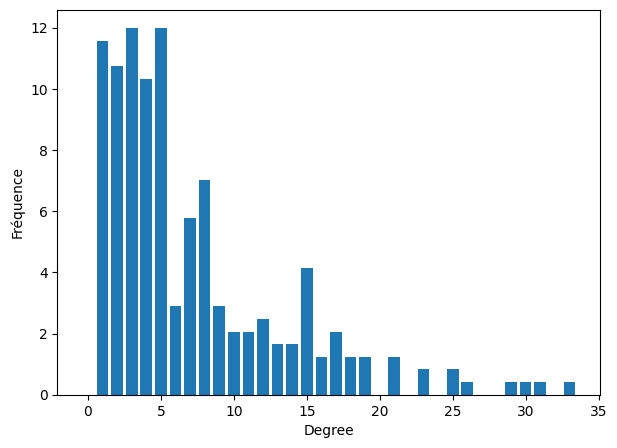

In [15]:
#Get the degree distribution : using degree_histogram
degree_frequency= nx.degree_histogram(G)
n=G.number_of_nodes()
degree_frequency = [d/n*100 for d in degree_frequency]

degree=[a for a in range(0,len(degree_frequency))]
hist_data = (degree, degree_frequency)
plt.figure(figsize=(7, 5)) 
plt.xlabel("Degree")
plt.ylabel("Fréquence")
plt.bar(*hist_data)

- Distribution loi de puissance

In [16]:
print(f"Le réseaux est il connecté ? : {nx.is_connected(G)}")

Le réseaux est il connecté ? : False


In [17]:
print(f"La densité du réseaux : {round(nx.density(G), 3)}")

La densité du réseaux : 0.03


In [18]:
avg_degree = sum([degree for node, degree in G.degree()])/G.number_of_nodes()
degree_sum_by_gender = {}
node_count_by_gender = {}
for node, degree in G.degree():
    gender = id_gender_dict.get(node) 
    if gender not in degree_sum_by_gender:
        degree_sum_by_gender[gender] = 0
        node_count_by_gender[gender] = 0
    degree_sum_by_gender[gender] += degree
    node_count_by_gender[gender] += 1

# Calculate and print average degree for each gender
print("Moyenne des degrés du réseau par genre :")
for gender in degree_sum_by_gender:
    avgg_degree = degree_sum_by_gender[gender] / node_count_by_gender[gender]
    if gender==0: gender="Homme"
    else: gender="Femme"
    print(f"Genre {gender} : {round(avgg_degree, 3)}")
print(f"La moyenne des degrés du réseau : {round(avg_degree,3)}")

Moyenne des degrés du réseau par genre :
Genre Homme : 7.09
Genre Femme : 7.509
La moyenne des degrés du réseau : 7.182


In [19]:
degree_sum_by_core = {}
node_count_by_core = {}
for node, degree in G.degree():
    core = id_core_dict.get(node) 
    if core not in degree_sum_by_core:
        degree_sum_by_core[core] = 0
        node_count_by_core[core] = 0
    degree_sum_by_core[core] += degree
    node_count_by_core[core] += 1

# Calculate and print average degree for each gender
print("Moyenne des degrés du réseau par core :")
for core in degree_sum_by_core:
    avgg_degree = degree_sum_by_core[core] / node_count_by_core[core]
    print(f"Core {core} : {round(avgg_degree, 3)}")

Moyenne des degrés du réseau par core :
Core 1 : 7.768
Core 0 : 6.803


In [20]:
# Get the degrees of each node
degrees = dict(G.degree())

# Sort the degrees in descending order
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

# Get the 20 nodes with the highest degrees
top_8_degree = sorted_degrees[:8]


# Print the 10 nodes with the highest degrees
print("Top 8 des noeuds les plus connectés:")
for node, degree in top_8_degree:
    gender=id_gender_dict.get(node, 'Unknown')
    core=id_core_dict.get(node, 'Unknown')
    if gender==0: gender="Homme"
    else: gender="Femme"
    print(f"{node}: {degree} - Genre: {gender} - Core: {core}")  

Top 8 des noeuds les plus connectés:
8172: 33 - Genre: Homme - Core: 1
8146: 31 - Genre: Homme - Core: 1
8162: 30 - Genre: Homme - Core: 1
8159: 29 - Genre: Homme - Core: 0
8174: 26 - Genre: Homme - Core: 0
8152: 25 - Genre: Homme - Core: 1
8139: 25 - Genre: Homme - Core: 0
8168: 23 - Genre: Homme - Core: 1


In [21]:
local_clustering = nx.clustering(G)
# Sort the nodes based on their local clustering coefficients
sorted_clustering = sorted(local_clustering.items(), key=lambda x: x[1], reverse=True)
top_50_clustering = sorted_clustering[:50]
for node, clustering in top_50_clustering:
    print(f"Node: {node}, Clustering coefficient: {clustering}")

Node: 38933, Clustering coefficient: 1.0
Node: 8040, Clustering coefficient: 1.0
Node: 38937, Clustering coefficient: 1.0
Node: 68560, Clustering coefficient: 1.0
Node: 113222, Clustering coefficient: 1.0
Node: 8163, Clustering coefficient: 1.0
Node: 67334, Clustering coefficient: 1.0
Node: 8113, Clustering coefficient: 1.0
Node: 73252, Clustering coefficient: 1.0
Node: 38957, Clustering coefficient: 1.0
Node: 8097, Clustering coefficient: 1.0
Node: 112880, Clustering coefficient: 1.0
Node: 8088, Clustering coefficient: 1.0
Node: 80517, Clustering coefficient: 1.0
Node: 8124, Clustering coefficient: 1.0
Node: 58004, Clustering coefficient: 1.0
Node: 8129, Clustering coefficient: 1.0
Node: 8173, Clustering coefficient: 1.0
Node: 8166, Clustering coefficient: 1.0
Node: 38961, Clustering coefficient: 1.0
Node: 55419, Clustering coefficient: 1.0
Node: 70898, Clustering coefficient: 1.0
Node: 68065, Clustering coefficient: 1.0
Node: 8175, Clustering coefficient: 1.0
Node: 8182, Clustering c

In [22]:
overlap = dict(top_8_degree).keys() & dict(top_50_clustering).keys()
print(overlap)

set()


In [23]:
avg_clustering = nx.average_clustering(G)
clustering_sum_by_gender = {}
node_count_by_gender = {}
node_clustering = nx.clustering(G)  
# Sum clustering coefficients and count nodes per gender
for node, clustering_coeff in node_clustering.items():
    gender = id_gender_dict.get(node)  # Get the gender, assume all nodes have valid genders
    if gender not in clustering_sum_by_gender:
        clustering_sum_by_gender[gender] = 0
        node_count_by_gender[gender] = 0
    clustering_sum_by_gender[gender] += clustering_coeff
    node_count_by_gender[gender] += 1

print("Average clustering coefficient of the network by gender:")
for gender in clustering_sum_by_gender:
    avgg_clustering = clustering_sum_by_gender[gender] / node_count_by_gender[gender]
    if gender==0: gender="Homme"
    else: gender="Femme"
    print(f"Gender {gender} : {round(avgg_clustering, 3)}")
print(f"The average clustering coefficient of the network is : {round(avg_clustering, 3)}")

Average clustering coefficient of the network by gender:
Gender Homme : 0.563
Gender Femme : 0.602
The average clustering coefficient of the network is : 0.571


In [24]:
clustering_sum_by_core = {}
node_count_by_core = {}
node_clustering = nx.clustering(G)  
# Sum clustering coefficients and count nodes per gender
for node, clustering_coeff in node_clustering.items():
    core = id_core_dict.get(node)  # Get the gender, assume all nodes have valid genders
    if gender not in clustering_sum_by_core:
        clustering_sum_by_core[core] = 0
        node_count_by_core[core] = 0
    clustering_sum_by_core[core] += clustering_coeff
    node_count_by_core[core] += 1

print("Average clustering coefficient of the network by gender:")
for core in clustering_sum_by_core:
    avgg_clustering = clustering_sum_by_core[core] / node_count_by_core[core]
    print(f"Core {core} : {round(avgg_clustering, 3)}")

Average clustering coefficient of the network by gender:
Core 1 : 0.0
Core 0 : 0.667


In [25]:
transitivity = nx.transitivity(G)
print("The global clustering coefficient of the network is : " + str(round(transitivity,3)))

The global clustering coefficient of the network is : 0.541


In [26]:
#community detection algorithm: Louvain
partition = community.louvain_communities(G, weight="Weight" ,resolution=0.7, seed=123)
#print("Louvain Partition:")
#print(partition)
N = len(partition)
print("Le nombre de communauté détectées :" + str(N))

Le nombre de communauté détectées :23


In [27]:
for node in G.nodes:
    for n in range(N) : 
        if node in partition[n] : 
            G.nodes[node]["community"]= n+1 


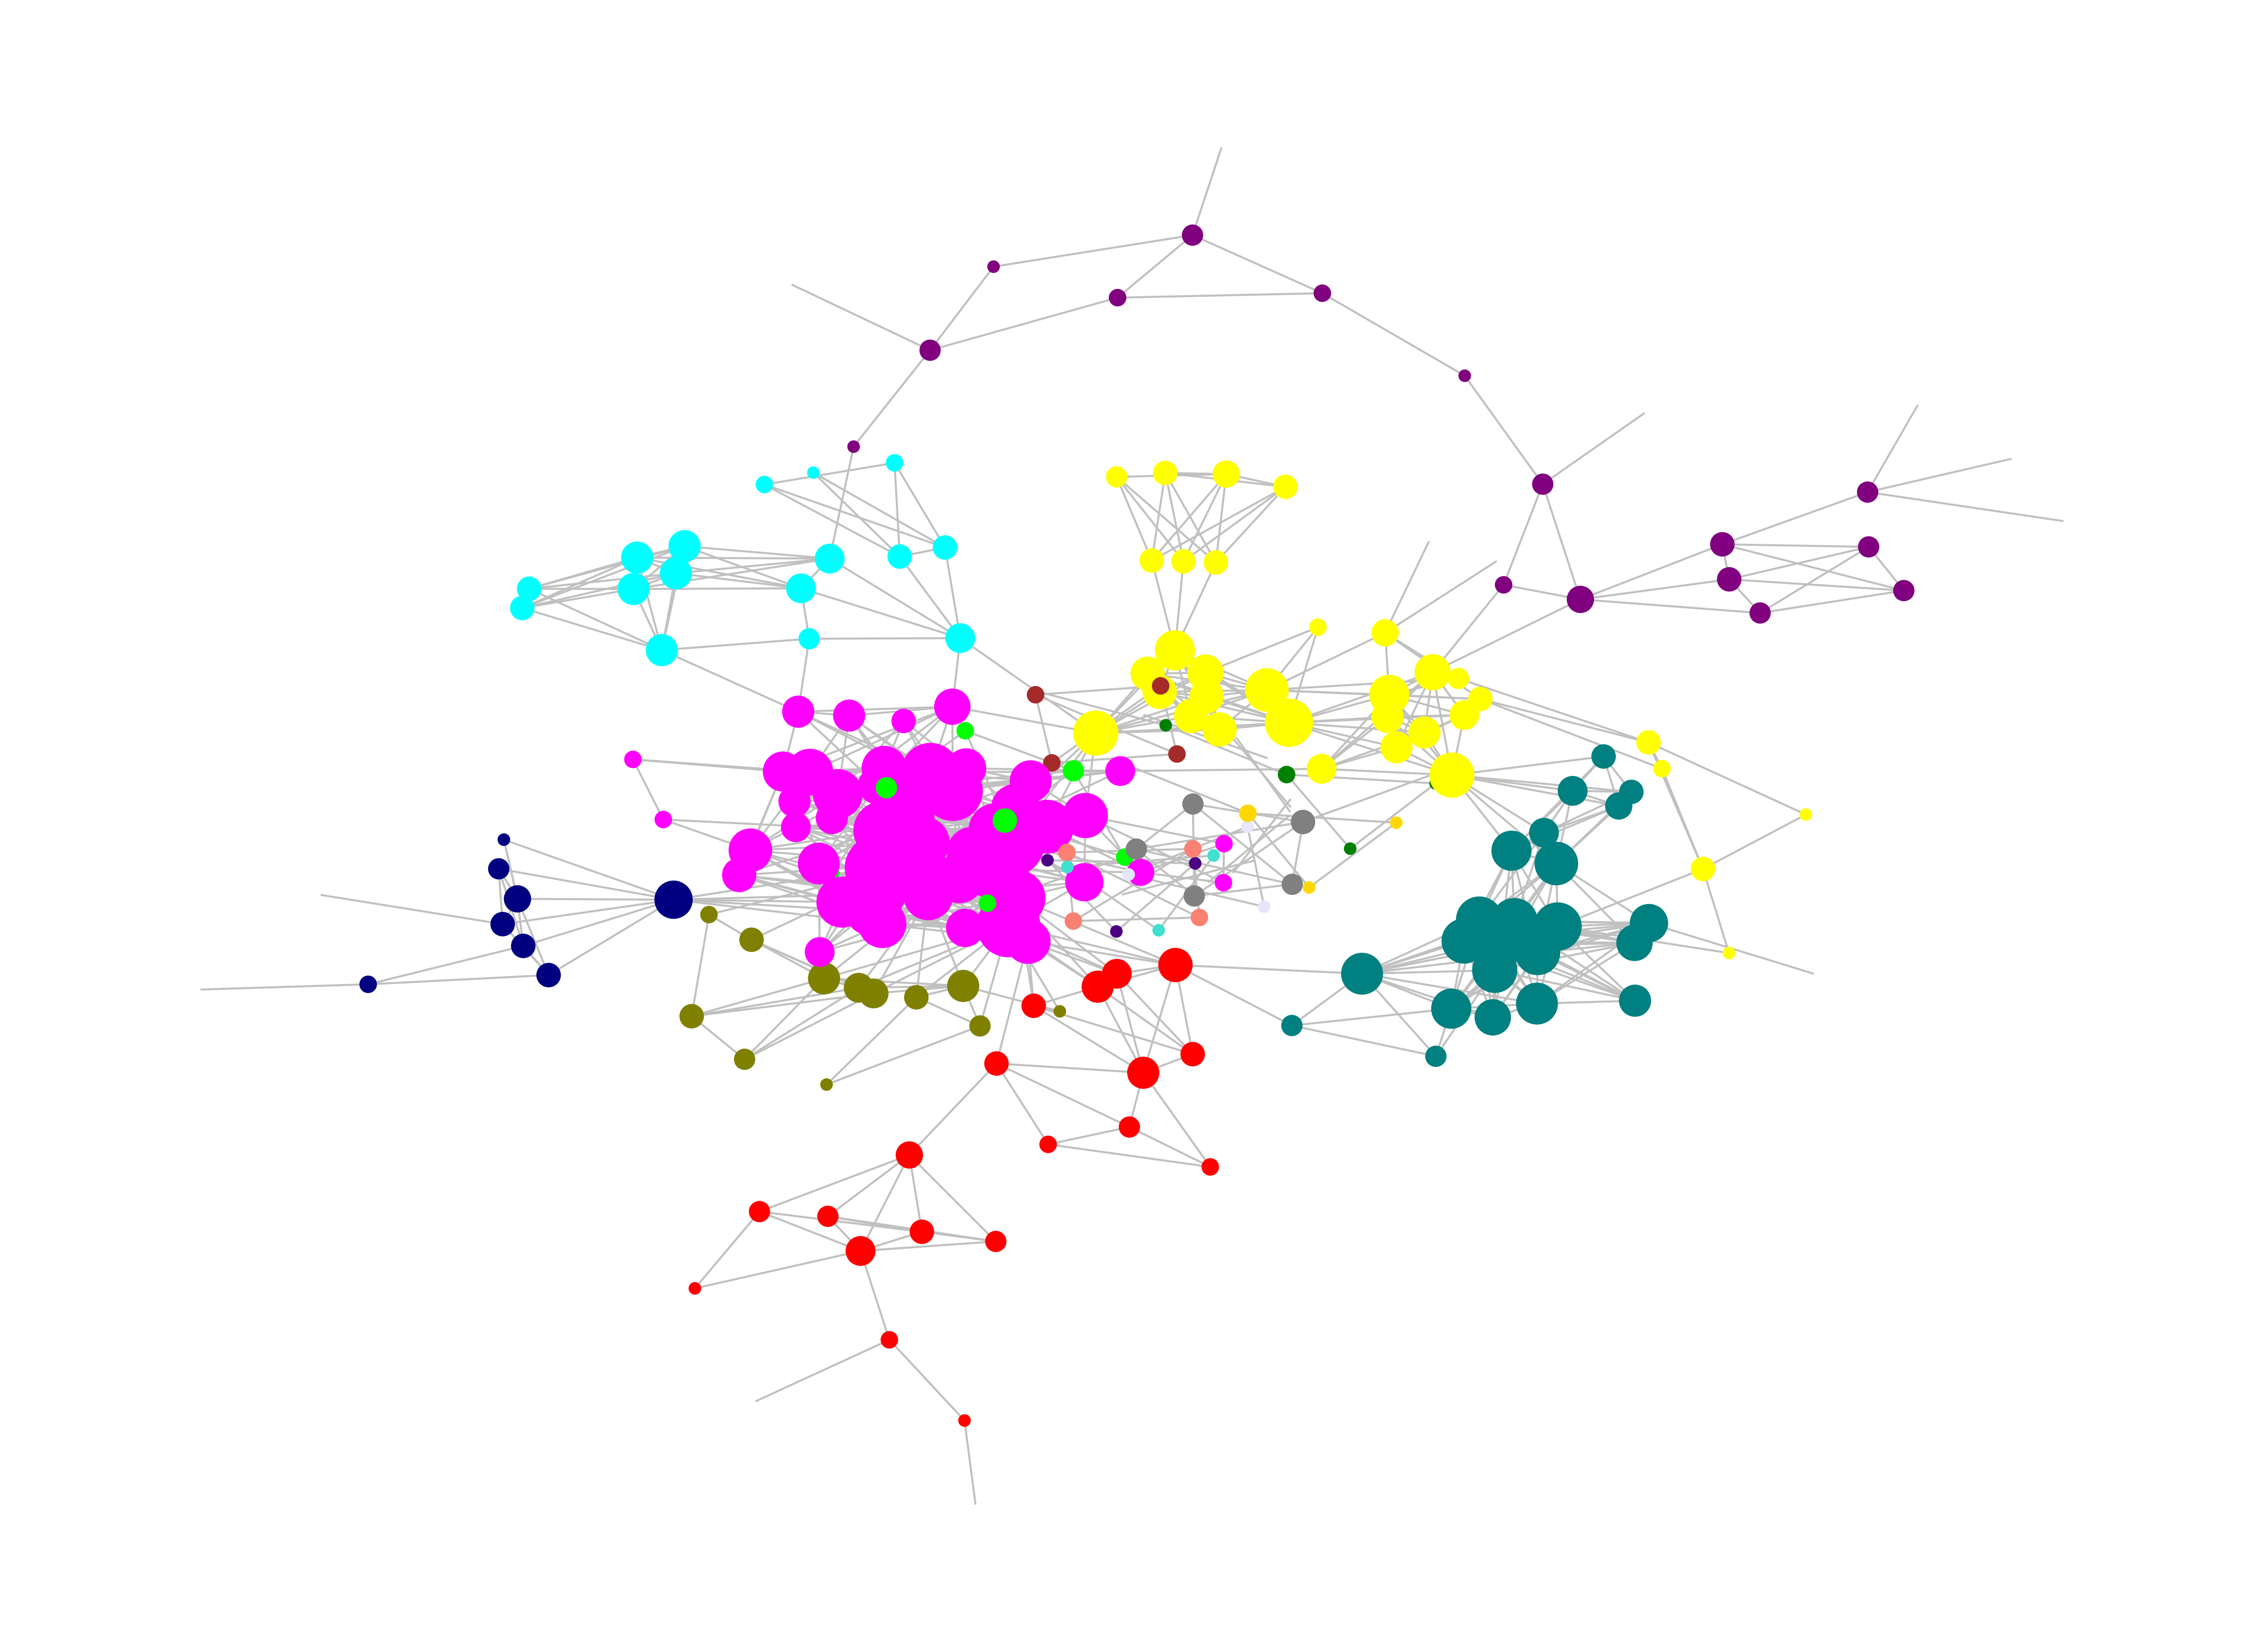

In [28]:
# Couleurs des noeuds en fonction de leur communauté
community_colors = {
    1: "orange", 2: "lightblue", 3: "green", 4: "pink", 5: "purple", 6: "yellow", 7: "brown",
    8: "cyan", 9: "magenta", 10: "lime", 11: "olive", 12: "teal", 13: "navy", 14: "indigo",
    15: "salmon", 16: "turquoise", 17: "tan", 18: "lavender", 19: "red", 20: "blue", 21: "gray",
    22: "black", 23: "gold"
}

# Liste des couleurs des noeud
node_colors = [community_colors[data["community"]] for node, data in G.nodes(data=True)]

# Layout du graphe
pos = nx.kamada_kawai_layout(G)

# Tailles des noeuds proportionnelles à leurs degrés
degrees = dict(G.degree())
min_degree = min(degrees.values())
max_degree = max(degrees.values())
node_sizes = [(degrees[node] - min_degree) / (max_degree - min_degree) * 10000 for node in G.nodes]

# Tracé du graphe
plt.figure(figsize=(60, 44))
nx.draw_networkx(G,pos=pos,node_color=node_colors,node_size=node_sizes, edge_color='silver',width=3.0,with_labels=False)
# Désactivation des axes
plt.axis('off')
# Affichage du graphe
plt.show()

## Après le traitement

In [30]:
H = nx.from_pandas_edgelist(edges_data[edges_data['post_link'] == 1], 'source', 'target', create_using=nx.Graph())

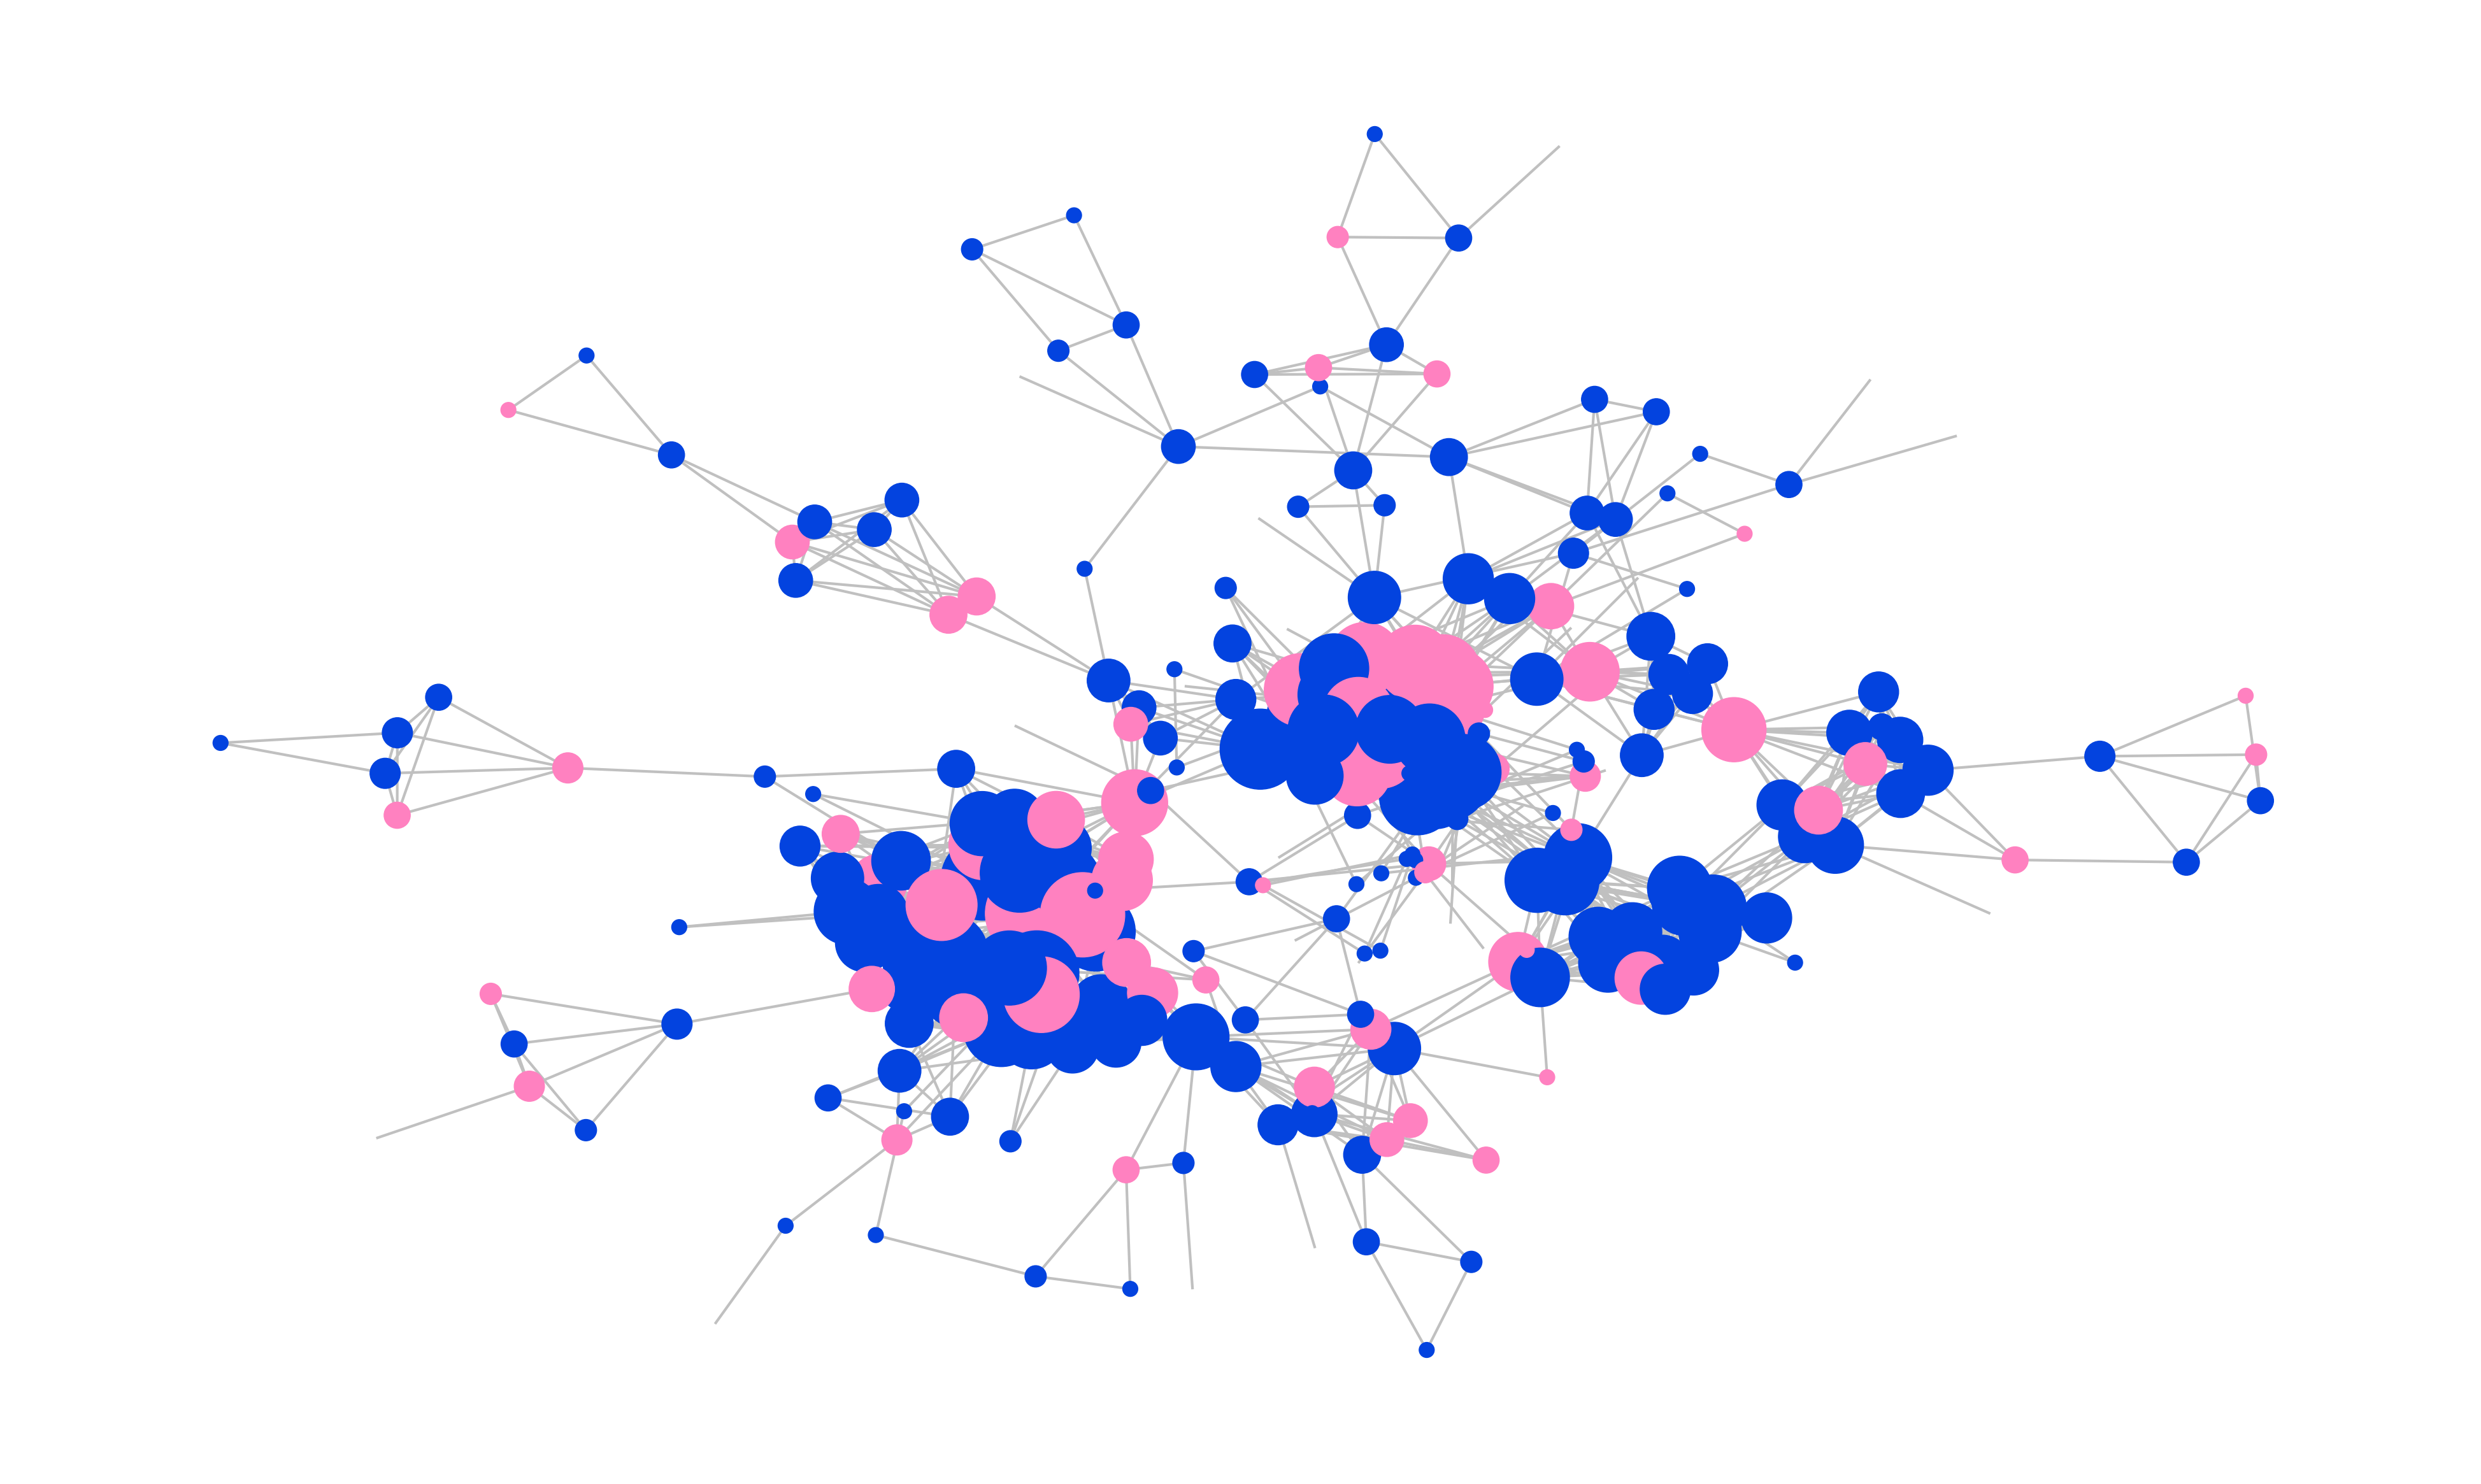

In [31]:
# Attribuer le genre (homme et femme) à chaque noeud du réseaux
gender_dict = nodes_data.set_index('id')['gender'].to_dict()
nx.set_node_attributes(H, gender_dict, 'gender')


#print(nx.get_node_attributes(G, 'gender'))
node_colors_H = []
for node in H.nodes(data=True):
    if node[1]["gender"]== 0 :
        node_colors_H.append("xkcd:blue")
    elif node[1]["gender"]== 1 :
        node_colors_H.append("xkcd:pink")
        
pos = nx.kamada_kawai_layout(H)

degrees = [d for n,d in H.degree()]
degree_min = min(degrees)
degree_max = max(degrees)
degrees = [(d-degree_min)  / (degree_max - degree_min)*10000 for d in degrees]

# Tracé du graphe
plt.figure(figsize=(50, 30))
nx.draw_networkx(H,pos=pos,node_color=node_colors_H,node_size=[v for v in degrees], edge_color='silver',width=3.0,with_labels=False)
# Désactivation des axes
plt.axis('off')
# Affichage du graphe
plt.show()

In [39]:
H.number_of_nodes()

286

In [40]:
num_female_nodes = 0

# Iterate over nodes and count female nodes
for node, attr in H.nodes(data=True):
    if attr['gender'] == 1:  # Assuming 1 represents female gender
        num_female_nodes += 1

# Print the number of female nodes
print("Number of female nodes:", num_female_nodes)

Number of female nodes: 75


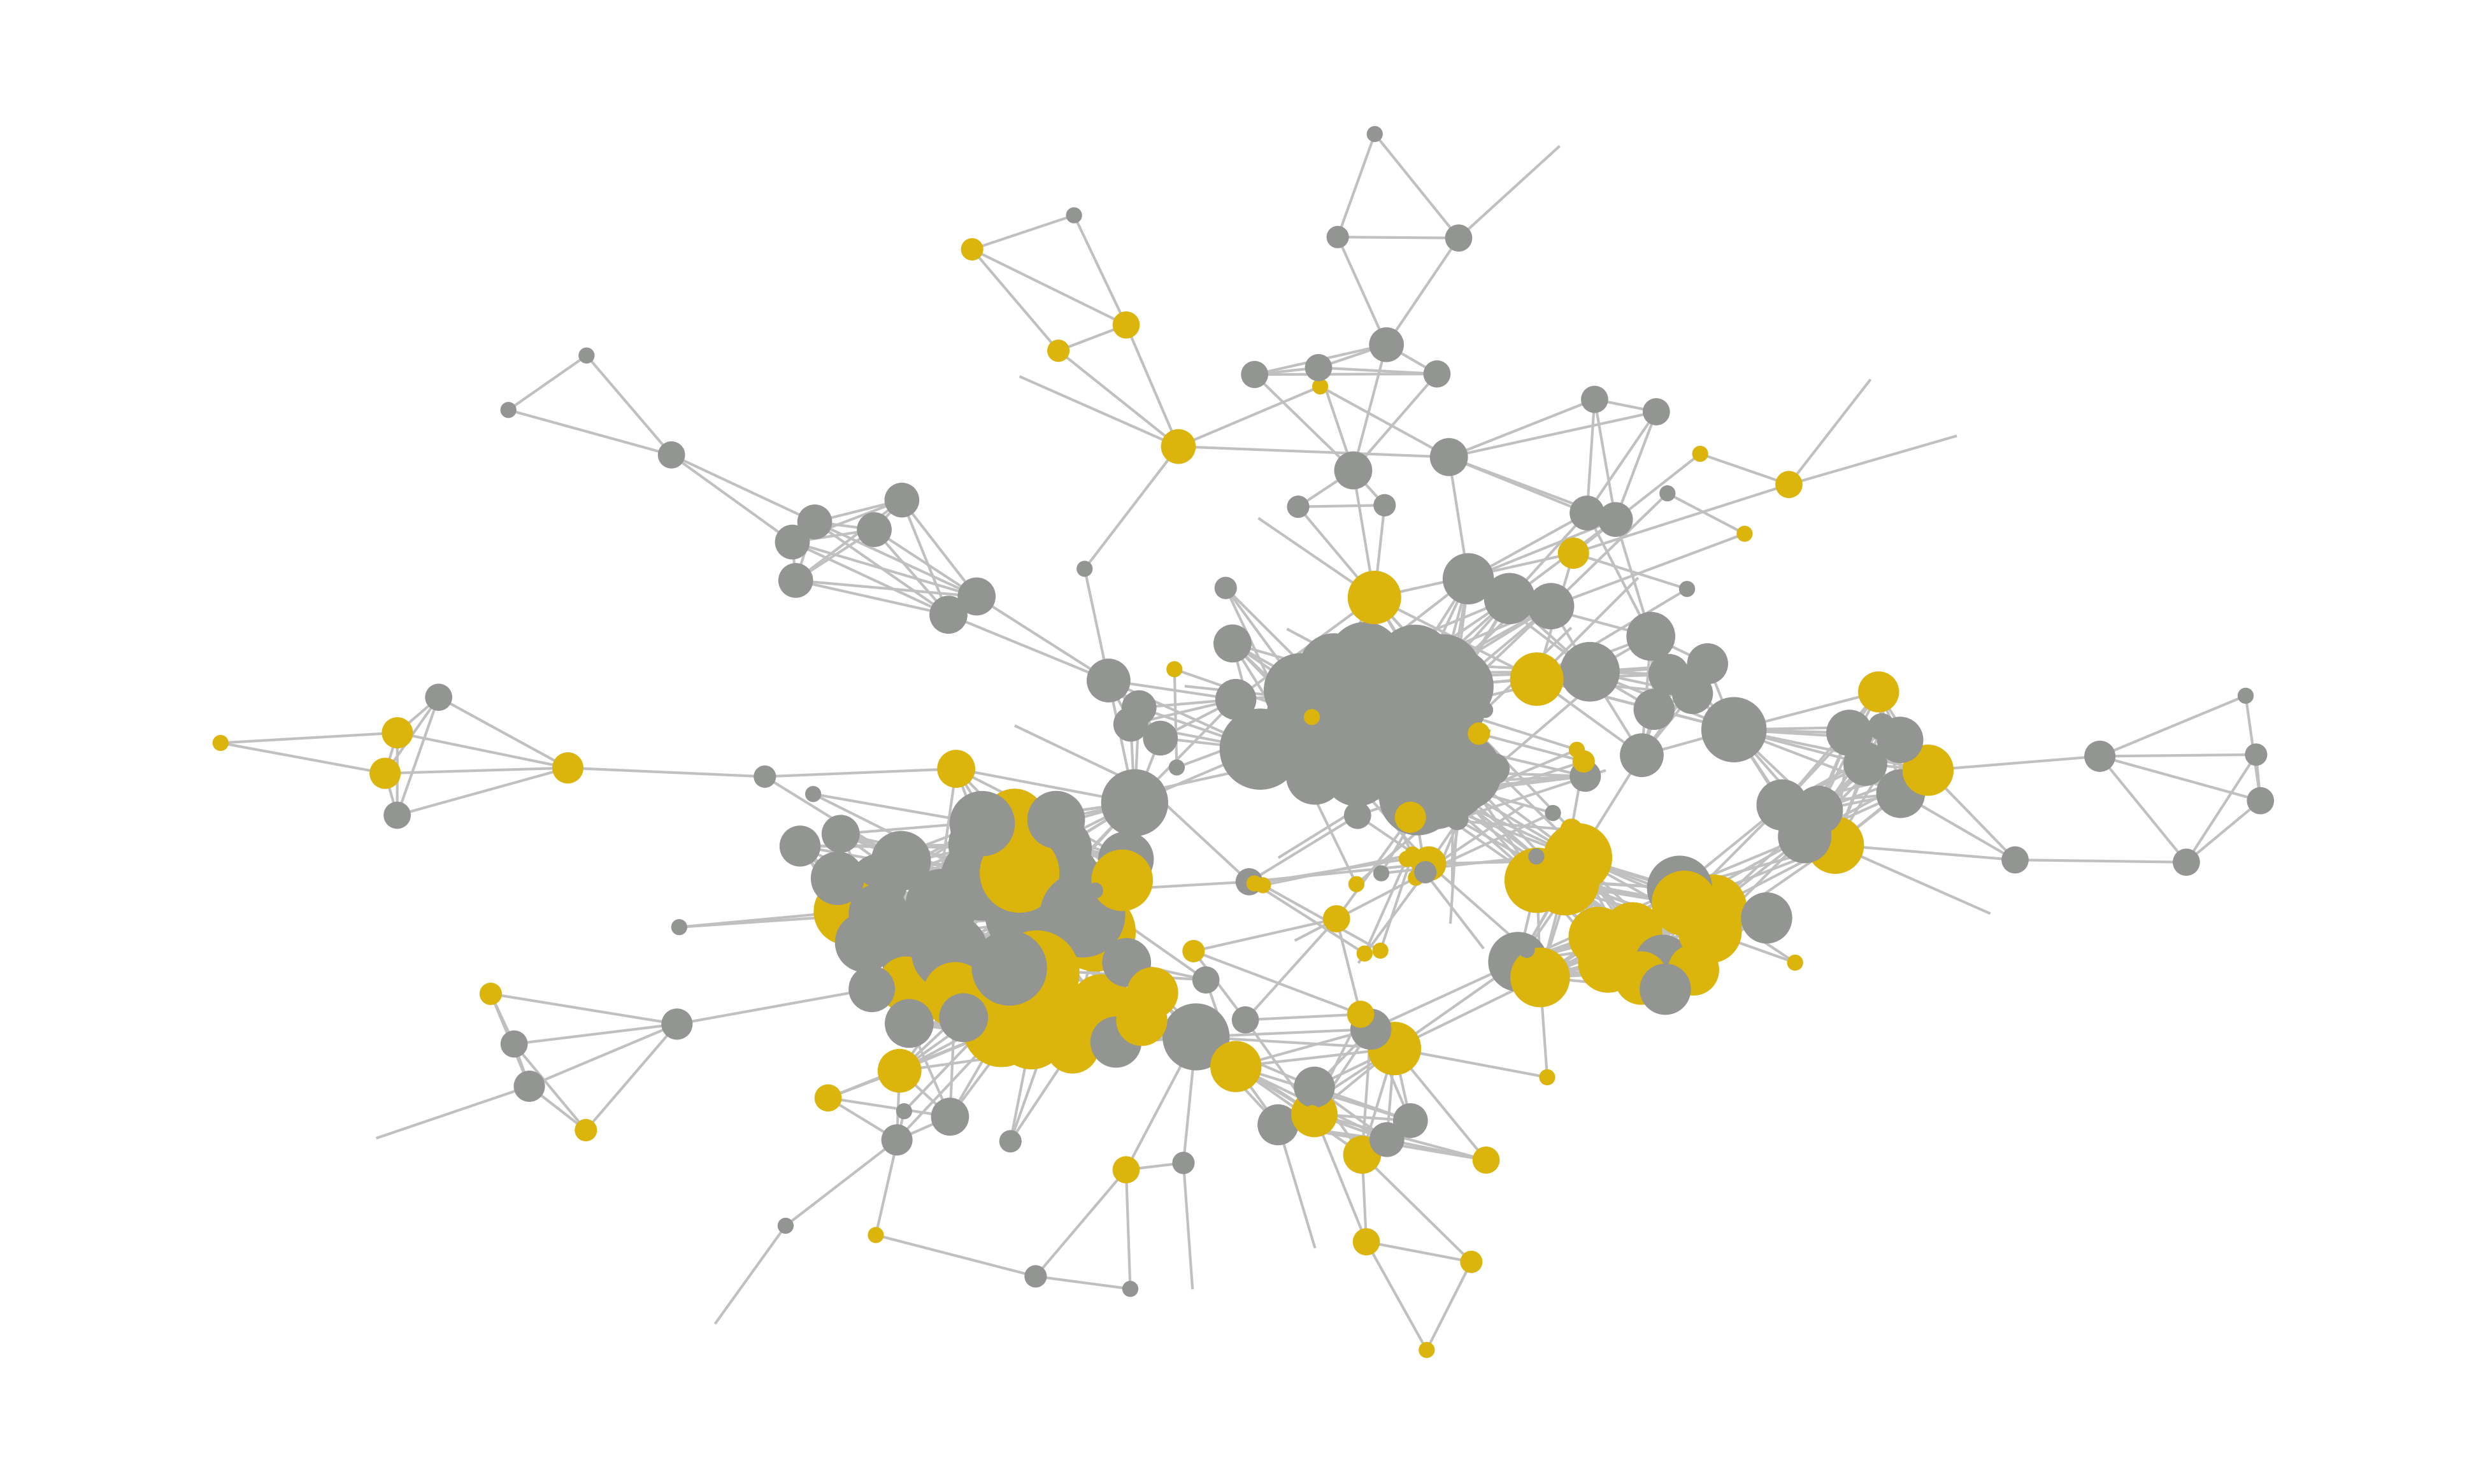

In [32]:
core_dict = nodes_data.set_index('id')['core'].to_dict()
nx.set_node_attributes(H, core_dict, 'core')

node_colors_2_H = []
for node in H.nodes(data=True):
    if node[1]["core"]== 0 :
        node_colors_2_H.append("xkcd:grey")
    elif node[1]["core"]== 1 :
        node_colors_2_H.append("xkcd:gold")
        
pos = nx.kamada_kawai_layout(H)

degrees = [d for n,d in H.degree()]
degree_min = min(degrees)
degree_max = max(degrees)
degrees = [(d-degree_min)  / (degree_max - degree_min)*10000 for d in degrees]

plt.figure(figsize=(50, 30))
nx.draw_networkx(H,pos=pos,node_color=node_colors_2_H,node_size=[v for v in degrees], edge_color='silver',width=3.0,with_labels=False)
# Désactivation des axes
plt.axis('off')
# Affichage du graphe
plt.show()

In [37]:
num_core_nodes = 0

# Iterate over nodes and count female nodes
for node, attr in H.nodes(data=True):
    if attr['core'] == 1:  # Assuming 1 represents female gender
        num_core_nodes += 1

# Print the number of female nodes
print("Number of core nodes:", num_core_nodes)

Number of core nodes: 100


In [163]:
print(f"le nombre de noeuds dans le réseaux : {H.number_of_nodes()}")

le nombre de noeuds dans le réseaux : 286


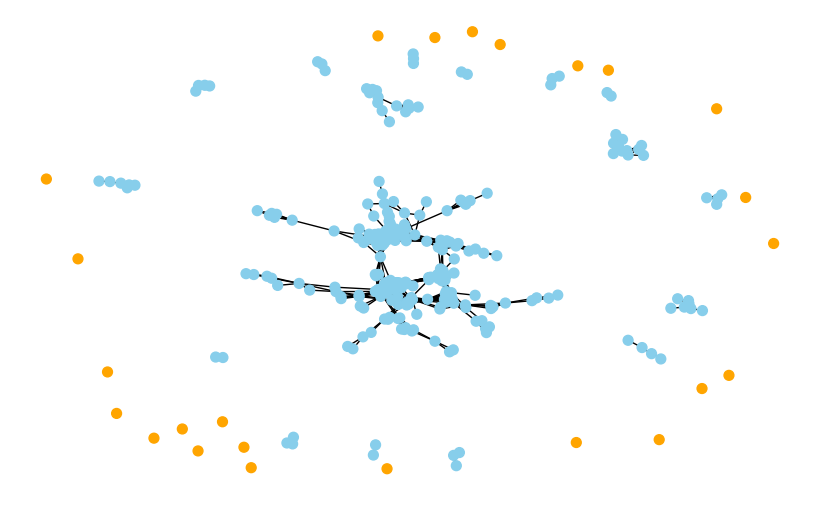

Le nombre de noeuds isolés : 24


In [33]:
# Create a new graph with isolated nodes
H_with_isolated = nx.Graph()

# Add nodes from your original graph G
H_with_isolated.add_nodes_from(H.nodes())

# Add isolated nodes that are not already in the graph H
isolated_nodes = [node for node in list_nodes if node not in H.nodes()]
H_with_isolated.add_nodes_from(isolated_nodes)

# Add edges between connected nodes in the original graph G
H_with_isolated.add_edges_from(H.edges())

# Draw the graph with isolated nodes and color them differently
plt.figure(figsize=(8, 5))
node_colors = ['skyblue' if node in H.nodes() else 'orange' for node in H_with_isolated.nodes()]
nx.draw(H_with_isolated, with_labels=False, node_color=node_colors, node_size=50, font_size=10)

# Show the plot
plt.show()
# If you want to count the number of isolated nodes added, you can do:
num_isolated_nodes_added = len(isolated_nodes)
print("Le nombre de noeuds isolés :", num_isolated_nodes_added)

In [34]:
list_nodes_in_H=list(H.nodes())
list_nodes= list(nodes_data["id"])
differences=set(list_nodes)-set(list_nodes_in_H)
differences
# Find genders for IDs in the list
gender_list = [id_gender_dict.get(id) for id in differences if id in id_gender_dict]
core_list = [id_core_dict.get(id) for id in differences if id in id_core_dict]
print(f"Le nombre d'hommes n'ayant pas de liens est :{gender_list.count(0)}")
print(f"Le nombre de femmes n'ayant pas de liens est :{gender_list.count(1)}")
print(f"Le nombre de core n'ayant pas de liens est :{core_list.count(1)}")
print(f"Le nombre de non-core n'ayant pas de liens est :{core_list.count(0)}")

Le nombre d'hommes n'ayant pas de liens est :23
Le nombre de femmes n'ayant pas de liens est :1
Le nombre de core n'ayant pas de liens est :4
Le nombre de non-core n'ayant pas de liens est :20


In [166]:
print(f"Le nombre de lien dans le réseaux : {H.number_of_edges()}")

Le nombre de lien dans le réseaux : 1258


<BarContainer object of 36 artists>

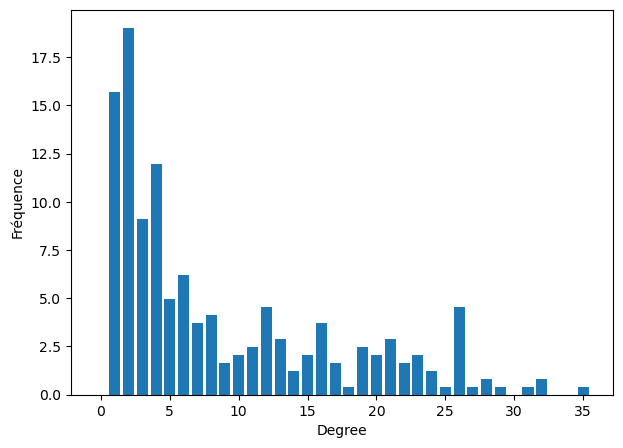

In [167]:
#Get the degree distribution : using degree_histogram
degree_frequency= nx.degree_histogram(H)
n=G.number_of_nodes()
degree_frequency = [d/n*100 for d in degree_frequency]

degree=[a for a in range(0,len(degree_frequency))]
hist_data = (degree, degree_frequency)
plt.figure(figsize=(7, 5)) 
plt.xlabel("Degree")
plt.ylabel("Fréquence")
plt.bar(*hist_data)

In [168]:
print(f"La densité du réseaux : {round(nx.density(H), 3)}")

La densité du réseaux : 0.031


In [169]:
avg_degree = sum([degree for node, degree in H.degree()])/H.number_of_nodes()
degree_sum_by_gender = {}
node_count_by_gender = {}
for node, degree in H.degree():
    gender = id_gender_dict.get(node) 
    if gender not in degree_sum_by_gender:
        degree_sum_by_gender[gender] = 0
        node_count_by_gender[gender] = 0
    degree_sum_by_gender[gender] += degree
    node_count_by_gender[gender] += 1

# Calculate and print average degree for each gender
print("Moyenne des degrés du réseau par genre :")
for gender in degree_sum_by_gender:
    avgg_degree = degree_sum_by_gender[gender] / node_count_by_gender[gender]
    if gender==0: gender="Homme"
    else: gender="Femme"
    print(f"Genre {gender} : {round(avgg_degree, 3)}")
print(f"La moyenne des degrés du réseau : {round(avg_degree,3)}")

Moyenne des degrés du réseau par genre :
Genre Homme : 8.431
Genre Femme : 9.827
La moyenne des degrés du réseau : 8.797


In [170]:
degree_sum_by_core = {}
node_count_by_core = {}
for node, degree in H.degree():
    core = id_core_dict.get(node) 
    if core not in degree_sum_by_core:
        degree_sum_by_core[core] = 0
        node_count_by_core[core] = 0
    degree_sum_by_core[core] += degree
    node_count_by_core[core] += 1

# Calculate and print average degree for each gender
print("Moyenne des degrés du réseau par core :")
for core in degree_sum_by_core:
    avgg_degree = degree_sum_by_core[core] / node_count_by_core[core]
    print(f"Core {core} : {round(avgg_degree, 3)}")

Moyenne des degrés du réseau par core :
Core 1 : 8.18
Core 0 : 9.129


In [171]:
# Get the degrees of each node
degrees = dict(H.degree())

# Sort the degrees in descending order
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

# Get the 20 nodes with the highest degrees
top_8_degree = sorted_degrees[:8]


# Print the 10 nodes with the highest degrees
print("Top 8 des noeuds les plus connectés:")
for node, degree in top_8_degree:
    gender=id_gender_dict.get(node, 'Unknown')
    core=id_core_dict.get(node, 'Unknown')
    if gender==0: gender="Homme"
    else: gender="Femme"
    print(f"{node}: {degree} - Genre: {gender} - Core: {core}")  

Top 8 des noeuds les plus connectés:
74874: 35 - Genre: Femme - Core: 0
8208: 32 - Genre: Femme - Core: 0
83029: 32 - Genre: Homme - Core: 1
67854: 31 - Genre: Homme - Core: 0
65591: 29 - Genre: Homme - Core: 0
8152: 28 - Genre: Homme - Core: 1
8171: 28 - Genre: Homme - Core: 1
8167: 27 - Genre: Femme - Core: 0


In [39]:
local_clustering = nx.clustering(H)
# Sort the nodes based on their local clustering coefficients
sorted_clustering = sorted(local_clustering.items(), key=lambda x: x[1], reverse=True)
top_50_clustering = sorted_clustering[:50]
for node, clustering in top_50_clustering:
    print(f"Node: {node}, Clustering coefficient: {clustering}")

Node: 109329, Clustering coefficient: 1.0
Node: 102130, Clustering coefficient: 1.0
Node: 8142, Clustering coefficient: 1.0
Node: 8051, Clustering coefficient: 1.0
Node: 39028, Clustering coefficient: 1.0
Node: 8052, Clustering coefficient: 1.0
Node: 38934, Clustering coefficient: 1.0
Node: 116369, Clustering coefficient: 1.0
Node: 38957, Clustering coefficient: 1.0
Node: 101310, Clustering coefficient: 1.0
Node: 105143, Clustering coefficient: 1.0
Node: 38951, Clustering coefficient: 1.0
Node: 8089, Clustering coefficient: 1.0
Node: 8118, Clustering coefficient: 1.0
Node: 58004, Clustering coefficient: 1.0
Node: 70477, Clustering coefficient: 1.0
Node: 8107, Clustering coefficient: 1.0
Node: 66876, Clustering coefficient: 1.0
Node: 80335, Clustering coefficient: 1.0
Node: 8097, Clustering coefficient: 1.0
Node: 76112, Clustering coefficient: 1.0
Node: 68016, Clustering coefficient: 1.0
Node: 85889, Clustering coefficient: 1.0
Node: 8143, Clustering coefficient: 1.0
Node: 8160, Cluster

In [172]:
overlap = dict(top_8_degree).keys() & dict(top_50_clustering).keys()
print(overlap)

set()


In [173]:
avg_clustering = nx.average_clustering(H)
clustering_sum_by_gender = {}
node_count_by_gender = {}
node_clustering = nx.clustering(H)  
# Sum clustering coefficients and count nodes per gender
for node, clustering_coeff in node_clustering.items():
    gender = id_gender_dict.get(node)  # Get the gender, assume all nodes have valid genders
    if gender not in clustering_sum_by_gender:
        clustering_sum_by_gender[gender] = 0
        node_count_by_gender[gender] = 0
    clustering_sum_by_gender[gender] += clustering_coeff
    node_count_by_gender[gender] += 1

print("Average clustering coefficient of the network by gender:")
for gender in clustering_sum_by_gender:
    avgg_clustering = clustering_sum_by_gender[gender] / node_count_by_gender[gender]
    print(f"Gender {gender} : {round(avgg_clustering, 3)}")
print(f"The average clustering coefficient of the network is : {round(avg_clustering, 3)}")

Average clustering coefficient of the network by gender:
Gender 0 : 0.596
Gender 1 : 0.652
The average clustering coefficient of the network is : 0.61


In [116]:
clustering_sum_by_core = {}
node_count_by_core = {}
node_clustering = nx.clustering(H)  
# Sum clustering coefficients and count nodes per gender
for node, clustering_coeff in node_clustering.items():
    core = id_core_dict.get(node)  # Get the gender, assume all nodes have valid genders
    if core not in clustering_sum_by_core:
        clustering_sum_by_core[core] = 0
        node_count_by_core[core] = 0
    clustering_sum_by_core[core] += clustering_coeff
    node_count_by_core[core] += 1

print("Average clustering coefficient of the network by core:")
for core in clustering_sum_by_core:
    avgg_clustering = clustering_sum_by_core[core] / node_count_by_core[core]
    print(f"Core {core} : {round(avgg_clustering, 3)}")

Average clustering coefficient of the network by core:
Core 1 : 0.603
Core 0 : 0.614


In [174]:
transitivity = nx.transitivity(H)
print("The global clustering coefficient of the network is : " + str(round(transitivity,3)))

The global clustering coefficient of the network is : 0.671


In [175]:
#community detection algorithm: Louvain
partition = community.louvain_communities(H, weight="Weight" ,resolution=0.7, seed=123)
#print("Louvain Partition:")
#print(partition)
N = len(partition)
print("Le nombre de communauté détectées :" + str(N))

Le nombre de communauté détectées :29


In [176]:
for node in H.nodes:
    for n in range(N) : 
        if node in partition[n] : 
            H.nodes[node]["community"]= n+1 


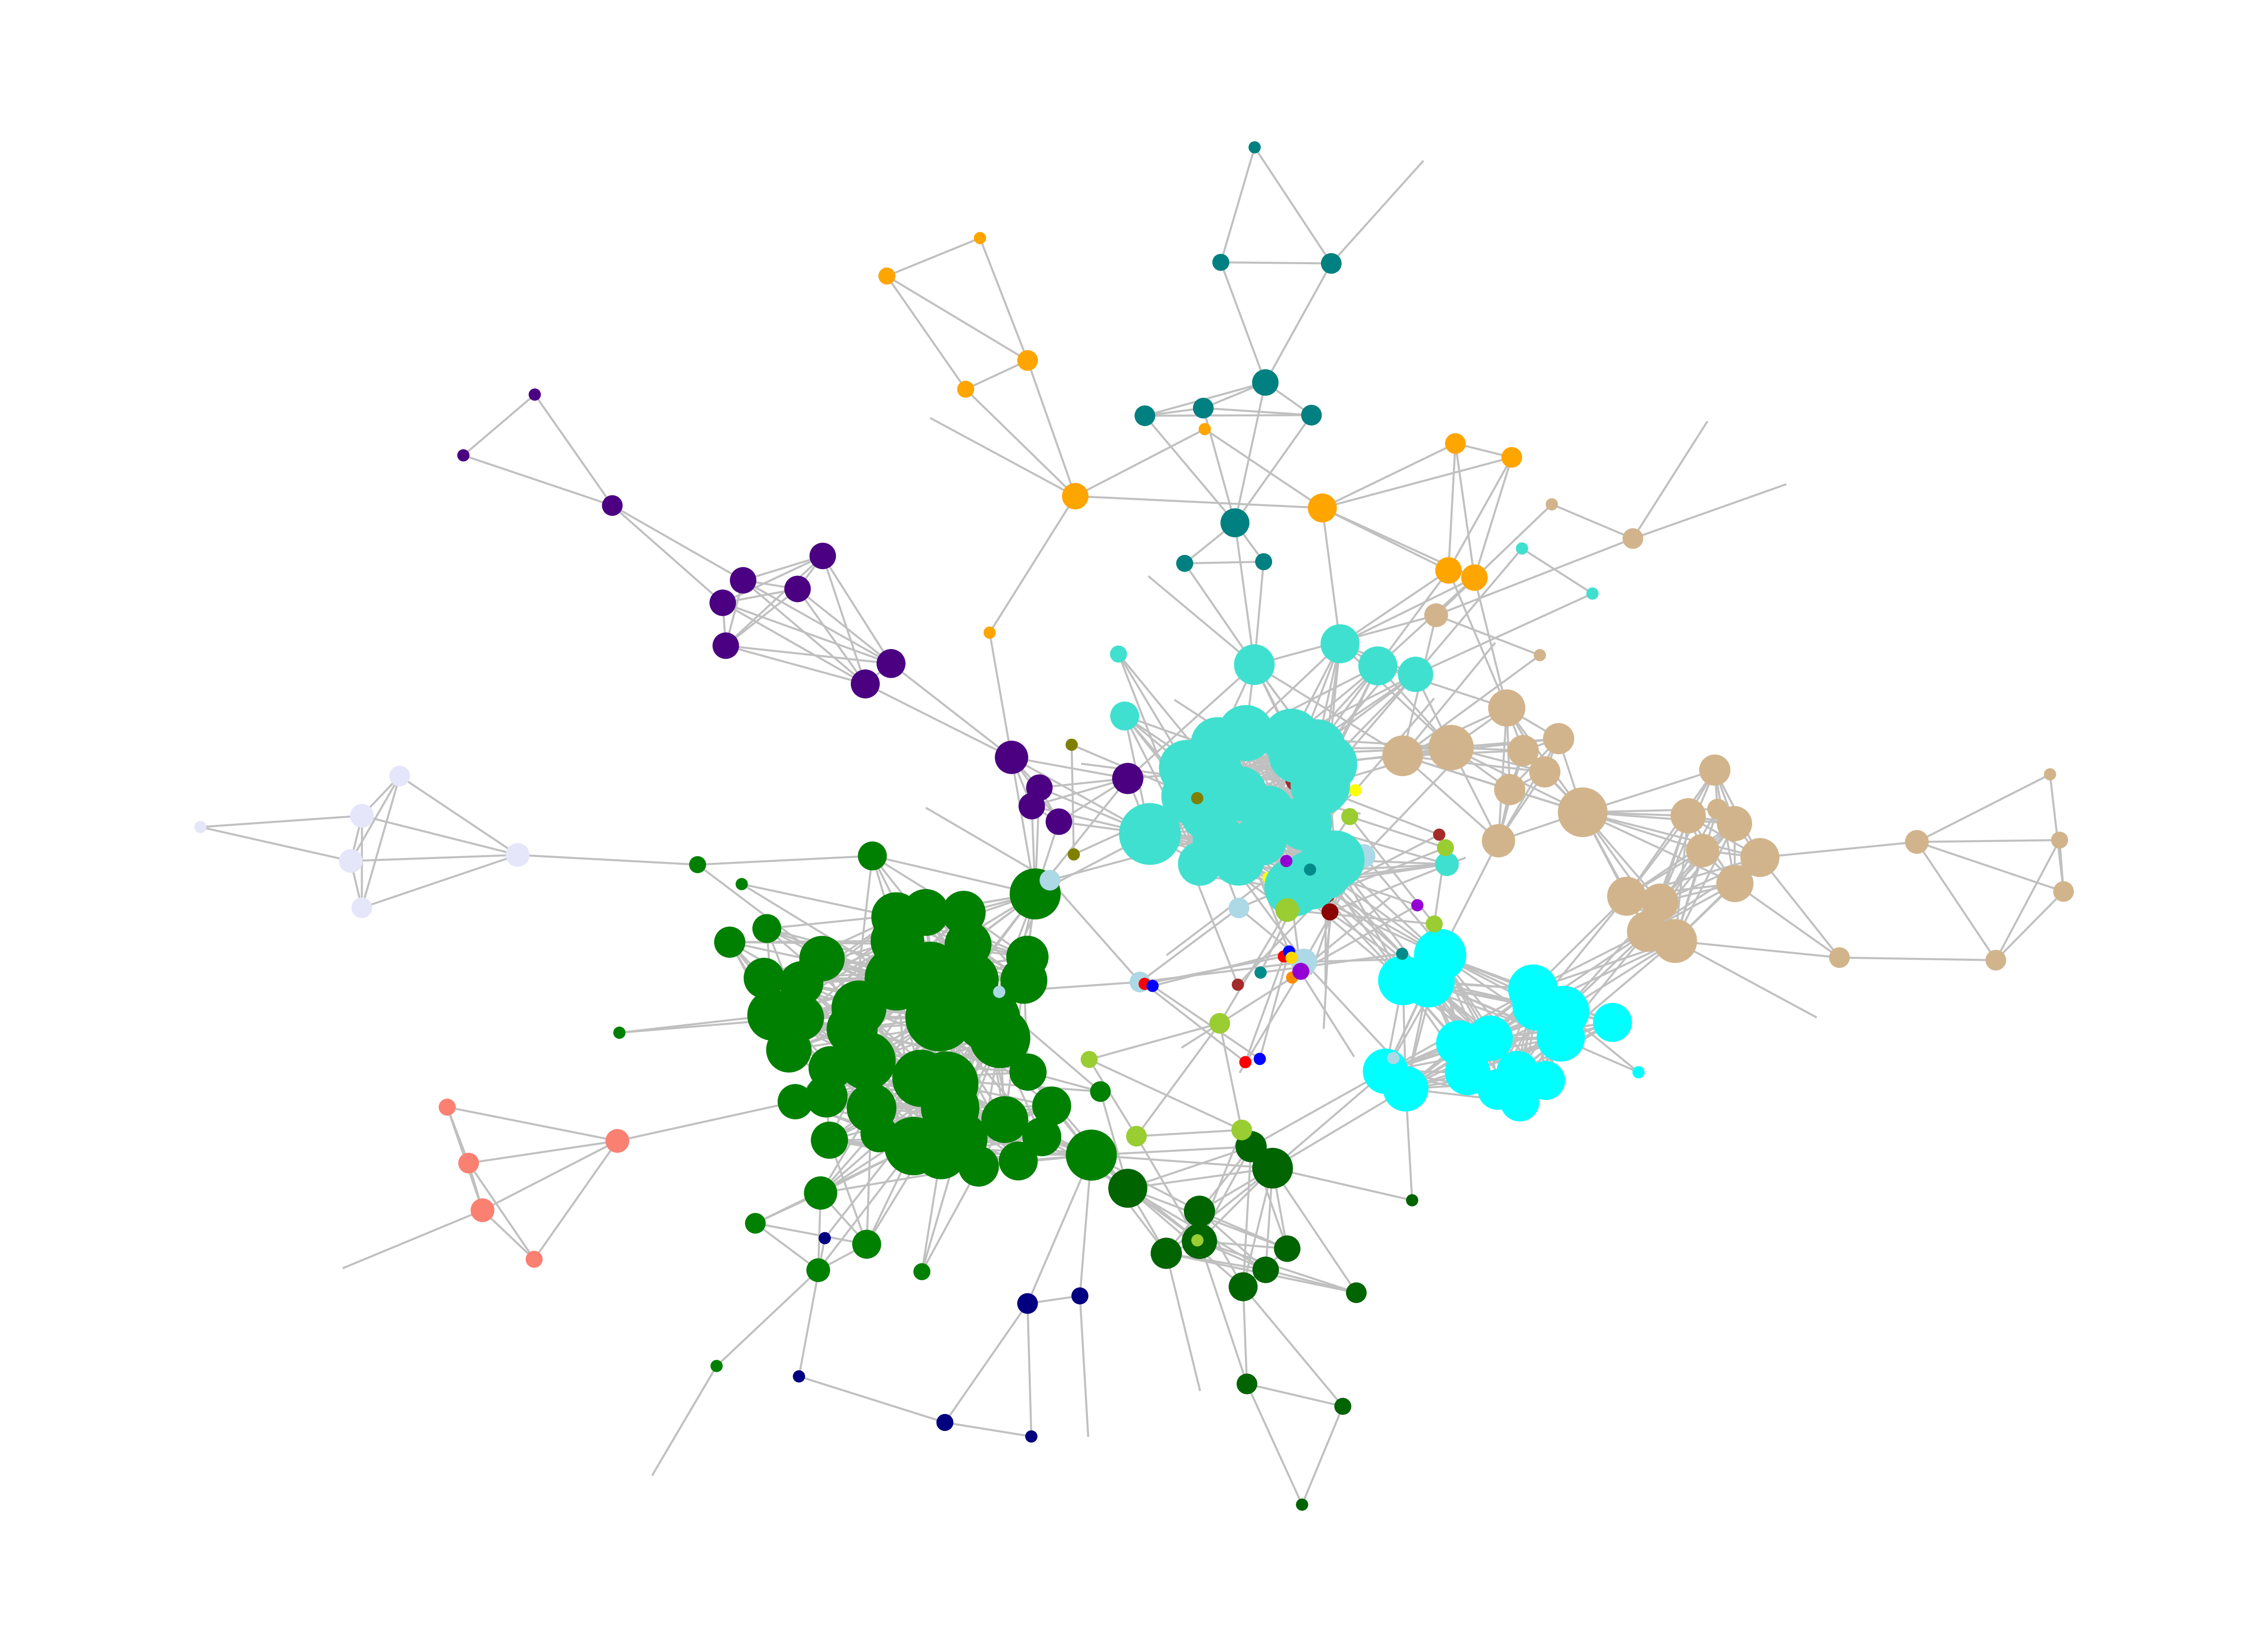

In [177]:
# Couleurs des noeuds en fonction de leur communauté
community_colors = {1: "orange",2: "lightblue",3: "green",4: "pink",5: "purple",6: "yellow",7: "brown",
    8: "cyan",9: "magenta",10: "lime",11: "olive",12: "teal",13: "navy",14: "indigo",15: "salmon",16: "turquoise",
    17: "tan",18: "lavender",19: "red",20: "blue",21: "yellowgreen",22: "gold",23: "darkorange",24: "darkgreen",
    25: "darkviolet",26: "darkcyan",27: "darkred",28: "darkblue",29: "darkgoldenrod"}

# Liste des couleurs des noeuds
node_colors = [community_colors[data["community"]] for node, data in H.nodes(data=True)]

# Layout du graphe
pos = nx.kamada_kawai_layout(H)

# Tailles des noeuds proportionnelles à leurs degrés
degrees = dict(H.degree())
min_degree = min(degrees.values())
max_degree = max(degrees.values())
node_sizes = [(degrees[node] - min_degree) / (max_degree - min_degree) * 10000 for node in H.nodes]

# Tracé du graphe
plt.figure(figsize=(60, 44))
nx.draw_networkx(H,pos=pos,node_color=node_colors,node_size=node_sizes, edge_color='silver',width=3.0,with_labels=False)
# Désactivation des axes
plt.axis('off')
# Affichage du graphe
plt.show()

In [52]:
centrality_G = nx.degree_centrality(G)
centrality_H = nx.degree_centrality(H)
centralities = pd.DataFrame({
    'Pre-intervention': centrality_G,
    'Post-intervention': centrality_H
})
print(centralities.describe())

       Pre-intervention  Post-intervention
count        242.000000         286.000000
mean           0.029800           0.030867
std            0.026289           0.029009
min            0.004149           0.003509
25%            0.012448           0.007018
50%            0.020747           0.017544
75%            0.037344           0.048246
max            0.136929           0.122807


# Analyse approfondie

## Approfondissement de l'analyse des attributs des noeuds

In [56]:
# Ajout des attributs 'gender' et 'core' aux nœuds
attributes = nodes_data.set_index('id').to_dict('index')
nx.set_node_attributes(G, attributes)
nx.set_node_attributes(H, attributes)


# Fonction pour calculer la centralité moyenne par attribut
def average_centrality_by_attribute(graph, attribute):
    centrality = nx.degree_centrality(graph)
    attribute_values = nx.get_node_attributes(graph, attribute)
    
    # Regrouper la centralité par attribut
    centrality_by_group = {}
    for node, attr_value in attribute_values.items():
        if attr_value not in centrality_by_group:
            centrality_by_group[attr_value] = []
        centrality_by_group[attr_value].append(centrality[node])
    
    # Calculer la moyenne par groupe
    average_centrality = {group: sum(centrals)/len(centrals) for group, centrals in centrality_by_group.items()}
    return average_centrality

# Utilisation de la fonction pour le genre et le statut core
gender_centrality_G = average_centrality_by_attribute(G, 'gender')
core_centrality_G = average_centrality_by_attribute(G, 'core')

gender_centrality_H = average_centrality_by_attribute(H, 'gender')
core_centrality_H = average_centrality_by_attribute(H, 'core')

print("Centralité moyenne par genre:", gender_centrality_G)
print("Centralité moyenne par statut core:", core_centrality_G)
print("\n")
print("Centralité moyenne par genre:", gender_centrality_H)
print("Centralité moyenne par statut core:", core_centrality_H)

Centralité moyenne par genre: {0: 0.02941886759314142, 1: 0.03115947702184294}
Centralité moyenne par statut core: {1: 0.03223411225158329, 0: 0.028227058458238034}


Centralité moyenne par genre: {0: 0.029583437266151105, 1: 0.03447953216374271}
Centralité moyenne par statut core: {1: 0.028701754385964937, 0: 0.03203169213355964}


## Analyse de l'homophilie

In [63]:
gender_assortativity_G = nx.attribute_assortativity_coefficient(G, 'gender')
print("Coefficient d'assortativité duu réseaux G pour 'gender' :", gender_assortativity_G)
# Calculer le coefficient d'assortativité pour 'core'
core_assortativity_G = nx.attribute_assortativity_coefficient(G, 'core')
print("Coefficient d'assortativité du réseaux G pour 'core' :", core_assortativity_G)
print("\n")
gender_assortativity_H = nx.attribute_assortativity_coefficient(H, 'gender')
print("Coefficient d'assortativité du réseaux H pour 'gender' :", gender_assortativity_H)
# Calculer le coefficient d'assortativité pour 'core'
core_assortativity_H = nx.attribute_assortativity_coefficient(H, 'core')
print("Coefficient d'assortativité du réseaux H pour 'core' :", core_assortativity_H)

Coefficient d'assortativité duu réseaux G pour 'gender' : 0.0353858846471159
Coefficient d'assortativité du réseaux G pour 'core' : 0.2699457994579946


Coefficient d'assortativité du réseaux H pour 'gender' : 0.023246484120864188
Coefficient d'assortativité du réseaux H pour 'core' : 0.30803678137086343
